Sourav Manna

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Hackathon.csv")

In [ ]:
df.shape

(499, 16)

In [ ]:
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,499.000000,4.990000e+02,4.680000e+02,498.000000,4.680000e+02,499.000000
mean,205.989328,8.612679e+10,5.854787e+09,0.448012,5.597840e+04,0.002004
std,369.373662,2.362916e+11,1.241645e+10,2.456470,1.458096e+05,0.005498
min,11.180000,6.190000e+09,-4.127000e+09,-0.198000,1.630000e+02,0.000144
25%,66.205000,1.845000e+10,1.267000e+09,0.073250,9.479500e+03,0.000429
50%,121.320000,3.270000e+10,2.470500e+09,0.130500,1.940000e+04,0.000761
75%,223.120000,6.800000e+10,5.363900e+09,0.251750,5.398800e+04,0.001582
max,4748.810000,2.930000e+12,1.220000e+11,36.853000,2.300000e+06,0.068258


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             499 non-null    object 
 1   Symbol               499 non-null    object 
 2   Shortname            499 non-null    object 
 3   Longname             499 non-null    object 
 4   Sector               499 non-null    object 
 5   Industry             499 non-null    object 
 6   Currentprice         499 non-null    float64
 7   Marketcap            499 non-null    float64
 8   Ebitda               468 non-null    float64
 9   Revenuegrowth        498 non-null    float64
 10  City                 499 non-null    object 
 11  State                480 non-null    object 
 12  Country              499 non-null    object 
 13  Fulltimeemployees    468 non-null    float64
 14  Longbusinesssummary  499 non-null    object 
 15  Weight               499 non-null    flo

In [ ]:
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,178.805,2.930000e+12,1.200000e+11,0.288,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.068258
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,315.410,2.370000e+12,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.055106
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2875.010,1.910000e+12,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044404
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2863.440,1.900000e+12,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044231
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3400.700,1.730000e+12,6.040400e+10,0.153,Seattle,WA,United States,1468000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040133


# **Data Preprocessing**

In [ ]:
df.isnull().sum()

,0
Exchange,0
Symbol,0
Shortname,0
Longname,0
Sector,0
Industry,0
Currentprice,0
Marketcap,0
Ebitda,31
Revenuegrowth,1


In [ ]:
# Check how many missing values we have first
missing_states = df['State'].isnull().sum()

if missing_states > 0:
    state_mode = df['State'].mode()[0]
    print(f"Filling {missing_states} missing states with mode: {state_mode}")
    df['State'] = df['State'].fillna(state_mode)
else:
    print("No missing values in State column.")

Filling 19 missing states with mode: CA


In [ ]:
# 1. Handle Missing Values
# For numerical finance data, median is often safer than mean to avoid outlier bias
df['Ebitda'] = df['Ebitda'].fillna(df['Ebitda'].median())
df['Revenuegrowth'] = df['Revenuegrowth'].fillna(df['Revenuegrowth'].median())
df['Fulltimeemployees'] = df['Fulltimeemployees'].fillna(df['Fulltimeemployees'].median())

In [ ]:
df.isnull().sum()

,0
Exchange,0
Symbol,0
Shortname,0
Longname,0
Sector,0
Industry,0
Currentprice,0
Marketcap,0
Ebitda,0
Revenuegrowth,0


In [ ]:
# Count exact duplicates
exact_duplicates = df.duplicated().sum()
print(f"Exact duplicate rows found: {exact_duplicates}")

Exact duplicate rows found: 0


No duplicates in our dataset.

# **EDA**

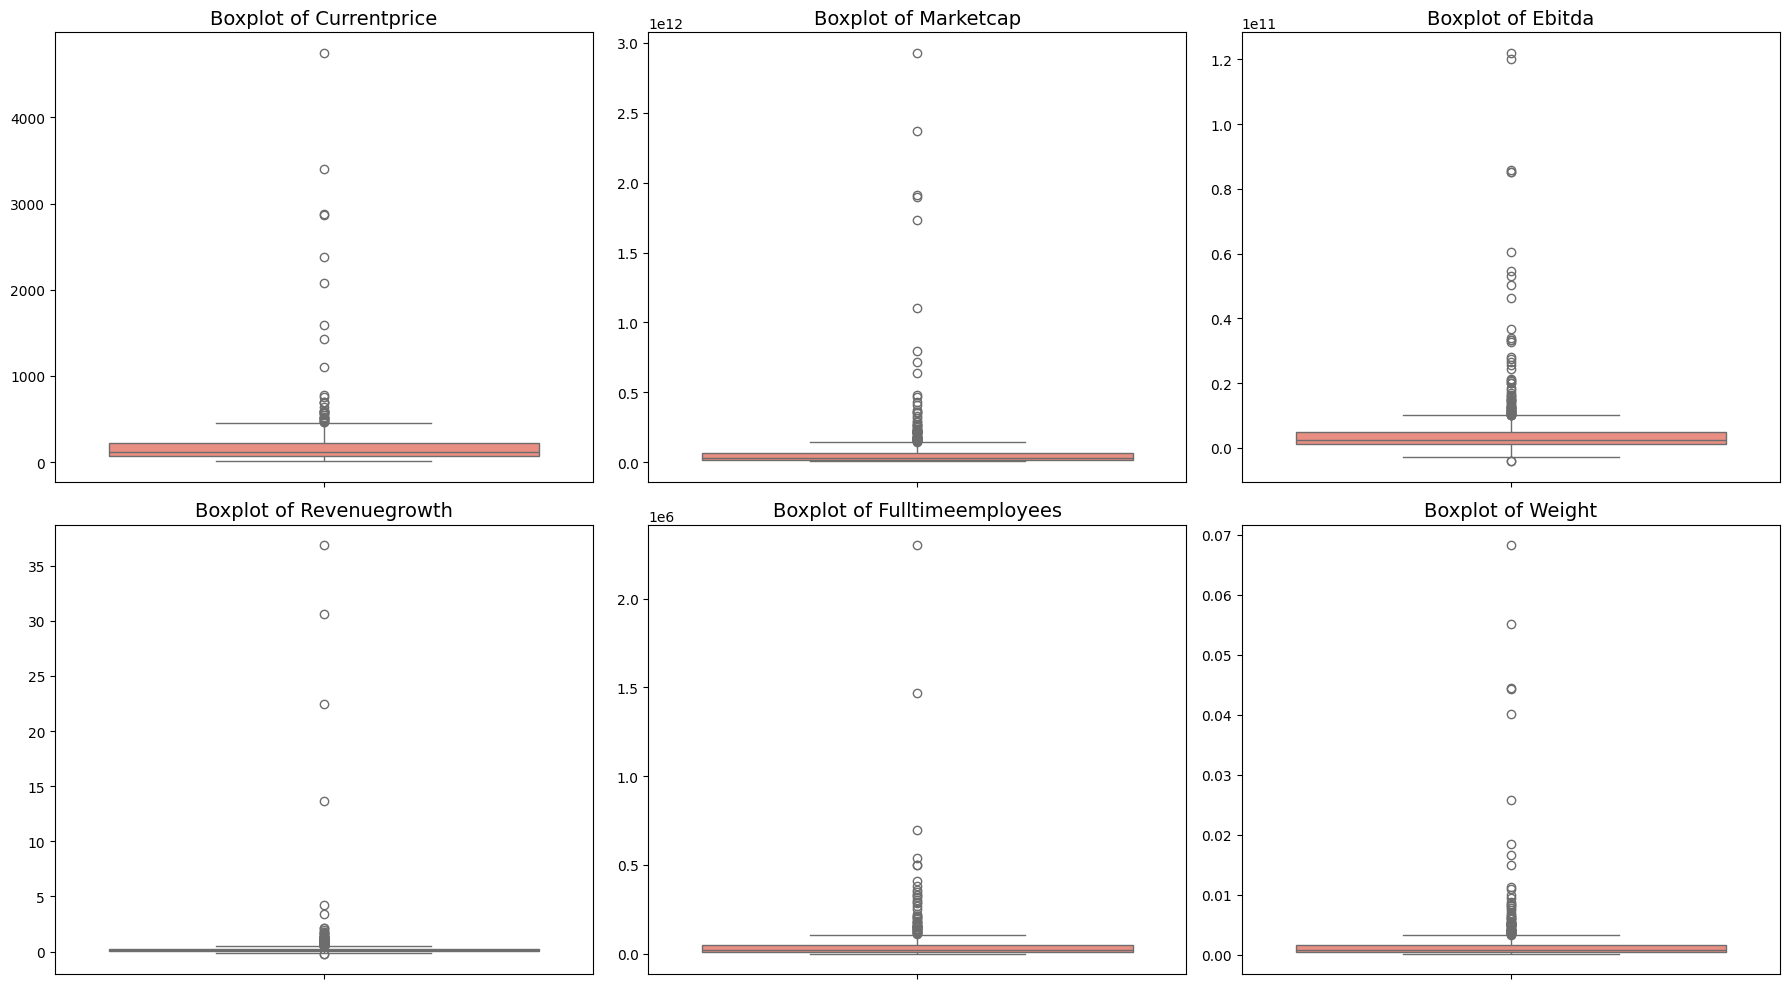

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We are not treating outliers in any of the columns as it is stock data and removing so will create biasness in our dataset.

In [ ]:
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,178.805,2.930000e+12,1.200000e+11,0.288,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.068258
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,315.410,2.370000e+12,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.055106
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2875.010,1.910000e+12,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044404
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2863.440,1.900000e+12,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044231
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3400.700,1.730000e+12,6.040400e+10,0.153,Seattle,WA,United States,1468000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040133


# **Log Transformation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Log Transformation (To make StandardScaler work with your outliers)
# This handles the extreme Marketcap/Ebitda values you saw in your boxplots
df['Log_Marketcap'] = np.log10(df['Marketcap'] + 1)
df['Log_Ebitda'] = np.log10(df['Ebitda'].abs() + 1) # .abs() because Ebitda can be negative

# 2. Ordinal Encoding for Market Cap 'Tiers'
def get_cap_tier(cap):
    if cap >= 200e9: return 4    # Mega-Cap
    elif cap >= 10e9: return 3   # Large-Cap
    elif cap >= 2e9: return 2    # Mid-Cap
    else: return 1               # Small-Cap

df['Cap_Tier'] = df['Marketcap'].apply(get_cap_tier)

# 3. Domain-Driven One-Hot Encoding for Risk Groups
risk_map = {
    'Technology': 'High_Growth', 'Communication Services': 'High_Growth',
    'Consumer Cyclical': 'Moderate', 'Financial Services': 'Moderate',
    'Industrials': 'Moderate', 'Energy': 'Moderate', 'Basic Materials': 'Moderate',
    'Healthcare': 'Defensive', 'Consumer Defensive': 'Defensive',
    'Utilities': 'Defensive', 'Real Estate': 'Defensive'
}

df['Risk_Group'] = df['Sector'].map(risk_map).fillna('Other')
df = pd.get_dummies(df, columns=['Risk_Group'], prefix='Group')

# 4. Financial Health Score (Boolean)
df['Quality_Score'] = ((df['Ebitda'] > 0) & (df['Revenuegrowth'] > 0)).astype(int)

We're prepping the data by using log transforms to reel in those massive market cap outliers and grouping sectors into risk tiers so the model can actually make sense of the financial logic.

# **Feature Selection and Scaling**

In [ ]:
# Select the final features for clustering
# Note: We use Log_Marketcap instead of raw Marketcap
final_features = [
    'Weight',
    'Revenuegrowth',
    'Log_Marketcap',
    'Log_Ebitda',
    'Cap_Tier',
    'Quality_Score'
] + [col for col in df.columns if 'Group_' in col]

X = df[final_features]

# Applying StandardScaler (as taught in class)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=final_features)
X_scaled_df.head()

,Weight,Revenuegrowth,Log_Marketcap,Log_Ebitda,Cap_Tier,Quality_Score,Group_Defensive,Group_High_Growth,Group_Moderate
0,12.061995,-0.065009,4.191787,3.439920,2.705323,0.333704,-0.680693,2.022829,-0.974279
1,9.667508,-0.092747,3.985878,3.133673,2.705323,0.333704,-0.680693,2.022829,-0.974279
2,7.719233,-0.015246,3.776402,3.127832,2.705323,0.333704,-0.680693,2.022829,-0.974279
3,7.687647,-0.015246,3.771306,3.127832,2.705323,0.333704,-0.680693,2.022829,-0.974279
4,6.941621,-0.120076,3.680315,2.814481,2.705323,0.333704,-0.680693,-0.494357,1.026400


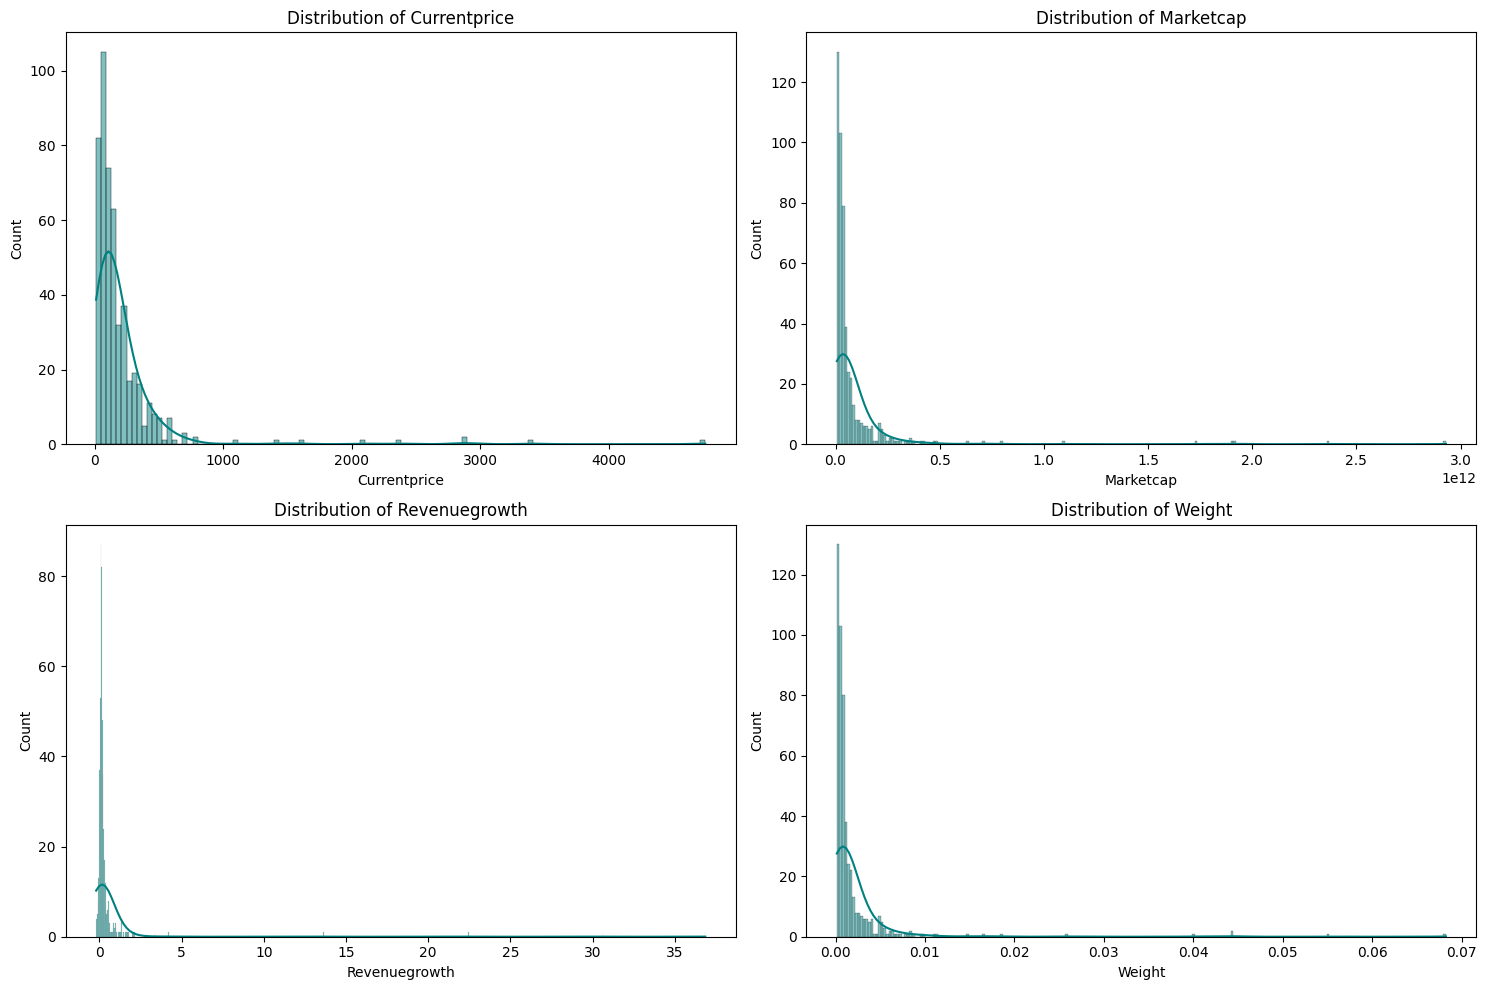

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['Currentprice', 'Marketcap', 'Revenuegrowth', 'Weight']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

All are highly right skewed.

Market Capitalization is extremely skewed toward large firms.

Most companies have relatively low stock prices, while a few companies have very high prices. This creates a long right tail, showing the presence of price outliers.

# **Correlation Heatmap**

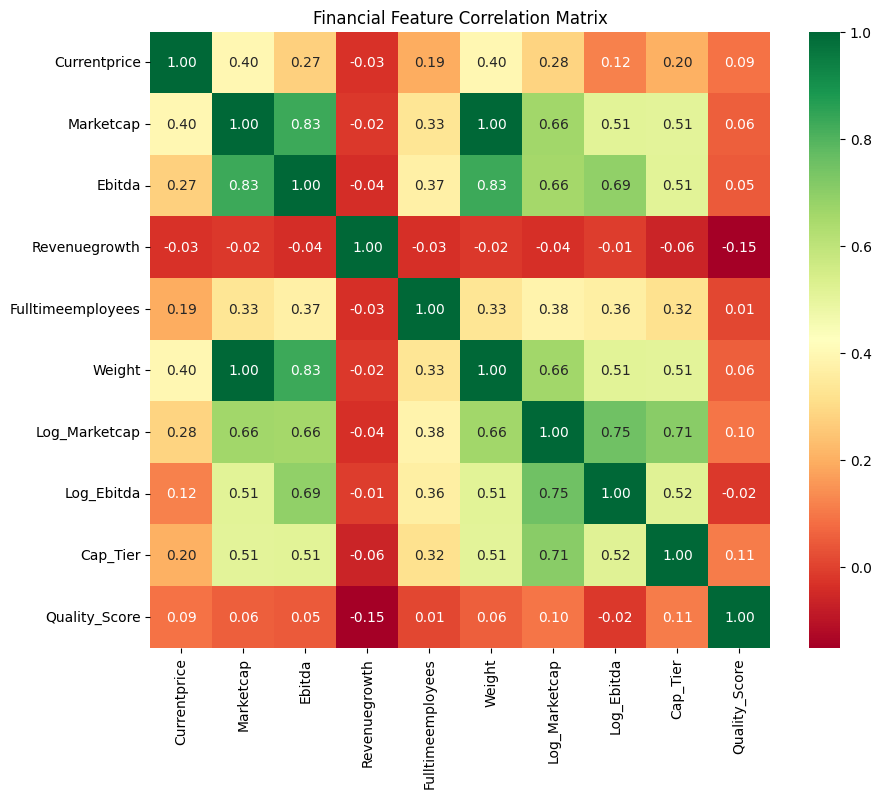

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Financial Feature Correlation Matrix')
plt.show()

Since we are not concentrating on prediction but want to look at the insights therefore we preserved all columns to retain full financial context.

# **Bivariate Analysis**

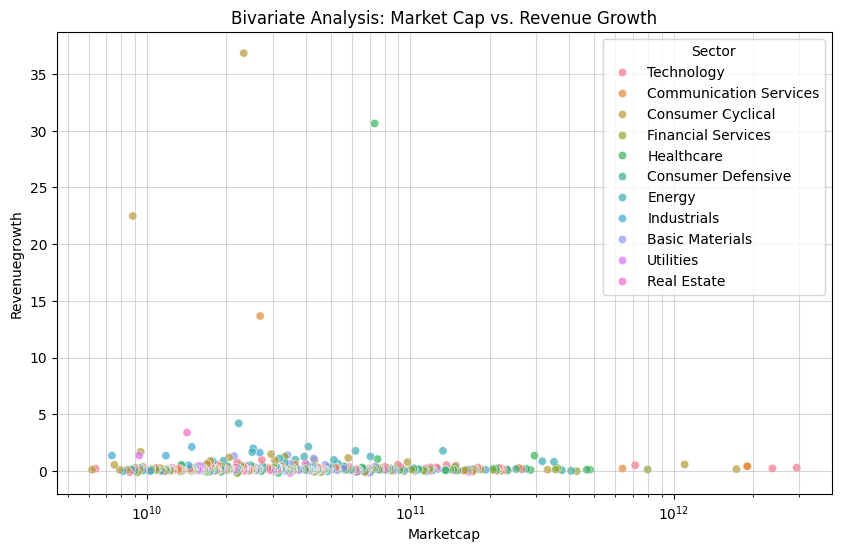

In [ ]:
# Scatter Plot: Market Cap vs Revenue Growth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketcap', y='Revenuegrowth', hue='Sector', alpha=0.7)
plt.xscale('log') # Essential for visualizing outliers alongside small caps
plt.title('Bivariate Analysis: Market Cap vs. Revenue Growth')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

Outliers are there in high revenue growth but they are mostly small to mid-cap companies meaning higher growth potential with higher risk.

Revenue growth is not strongly dependent on market cap. Meaning growth opportunities are more likely driven by sector dynamics and company strategy rather than company size alone.


# **Multivariate Analysis**

/tmp/ipython-input-1301183745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sector', y='Revenuegrowth', palette='Set3')


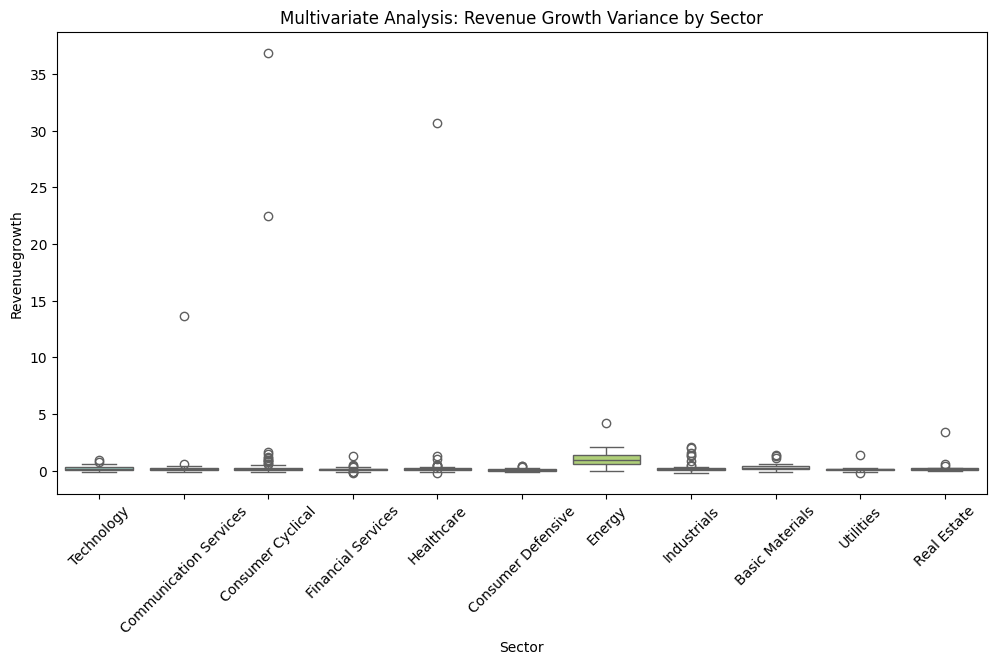

In [ ]:
# Boxplot of Revenue Growth by Sector
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sector', y='Revenuegrowth', palette='Set3')
plt.xticks(rotation=45)
plt.title('Multivariate Analysis: Revenue Growth Variance by Sector')
plt.show()

No strong relationship between company size and revenue growth is being observed.


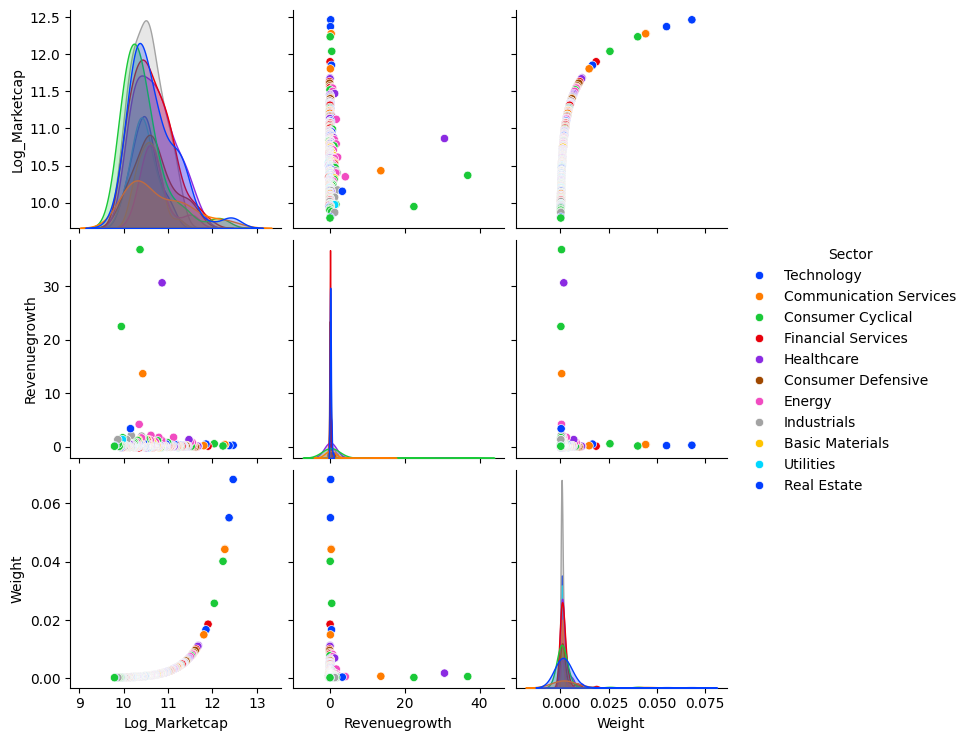

In [ ]:
# Pairplot for high-level interaction
# We'll pick 3-4 key variables to avoid a messy plot
sns.pairplot(df[['Log_Marketcap', 'Revenuegrowth', 'Weight', 'Sector']], hue='Sector', palette='bright')
plt.show()

Revenue Growth is highly skewed with a few extreme outliers.

Log Market Cap vs. Weight shows a clear positive relationship menaing larger companies consistently receive higher portfolio weights, regardless of sector, reflecting a size-driven allocation strategy.

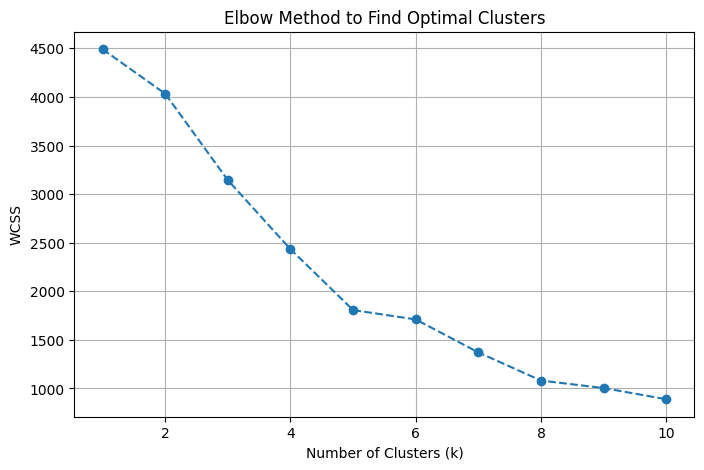

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We use the X_scaled from our previous step
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

The WCSS drops sharply up to k = 5, indicating significant improvement in cluster compactness.

Hence, k = 5 is the optimal number of clusters.

In [ ]:
# 1. Fit the KMeans model with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 2. Analyze the clusters based on our original financial features
# We look at the MEAN of each feature per cluster to define the "Profile"
cluster_summary = df.groupby('Cluster').agg({
    'Revenuegrowth': 'mean',
    'Marketcap': 'mean',
    'Ebitda': 'mean',
    'Weight': 'mean',
    'Cap_Tier': 'mean'
}).sort_values(by='Marketcap', ascending=False) # Sorting by size often helps identify safety

print("Cluster Profiles for Advisory System:")
display(cluster_summary)

Cluster Profiles for Advisory System:


,Revenuegrowth,Marketcap,Ebitda,Weight,Cap_Tier
Cluster,,,,,
2,0.229439,5.646585e+11,2.999486e+10,0.013139,4.000000
4,0.203074,4.558704e+10,3.828356e+09,0.001061,2.975309
3,0.159748,4.298329e+10,3.530445e+09,0.001000,2.951049
0,0.308198,4.284730e+10,3.348244e+09,0.000997,2.943478
1,25.913750,3.305750e+10,4.474654e+08,0.000769,2.750000


/tmp/ipython-input-3812979218.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='magma')


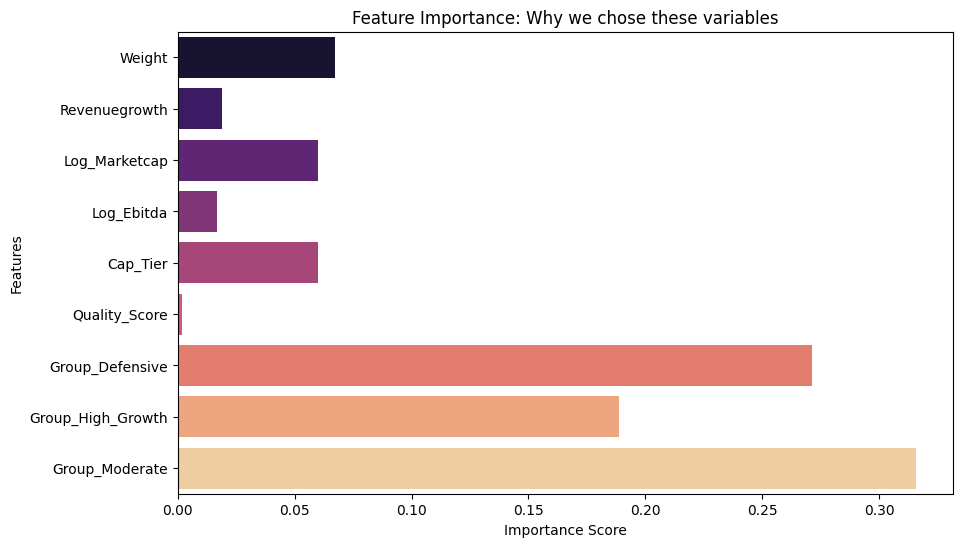

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# We use the Cluster labels we just generated as the 'target'
# to see which features best define those groups
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, df['Cluster'])

# Get Feature Importances
importances = rf.feature_importances_
feature_names = final_features

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='magma')
plt.title('Feature Importance: Why we chose these variables')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Group_Moderate, Group_Defensive, and Group_High_Growth explain most of the variation, indicating that investment style,segment matters more than individual metrics.


Among fundamentals, Weight, Log_Marketcap, and Cap_Tier have moderate influence, while Quality_Score and Revenue Growth contribute minimally to predictions.



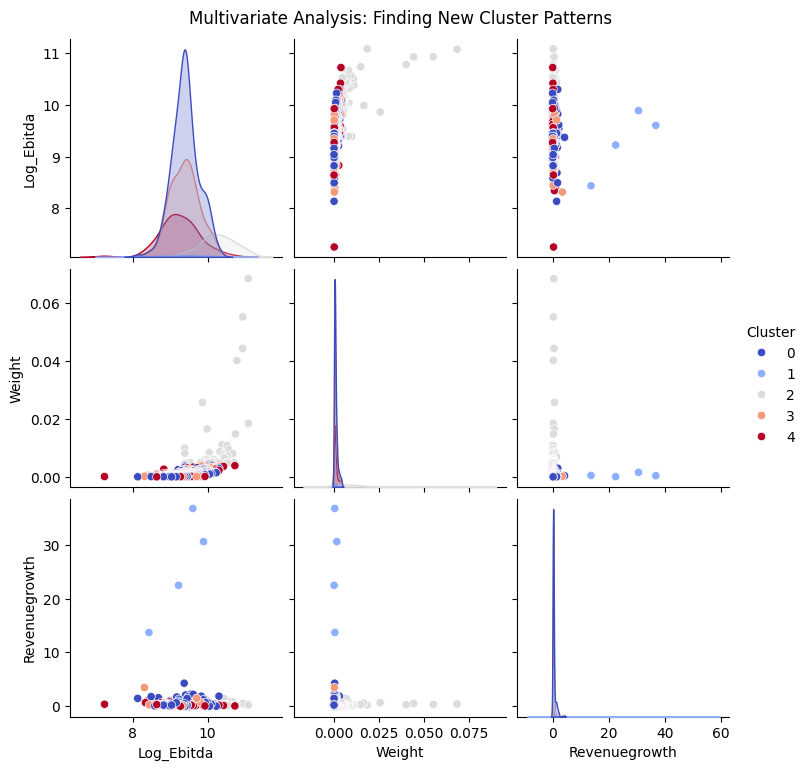

In [ ]:
# Select alternative features to see if new patterns emerge
alt_features = ['Log_Ebitda', 'Weight', 'Revenuegrowth', 'Cluster']

sns.pairplot(df[alt_features], hue='Cluster', palette='coolwarm', diag_kind='kde')
plt.suptitle('Multivariate Analysis: Finding New Cluster Patterns', y=1.02)
plt.show()

Clusters separate mainly on Log_Ebitda and Revenue Growth, showing distinct profitability–growth profiles rather than weight differences.

Weight is highly concentrated near zero across clusters, so it adds little discriminating power in cluster formation.

A few high-growth outliers drive cluster uniqueness, indicating niche or emerging firms distinct from stable, mature ones.

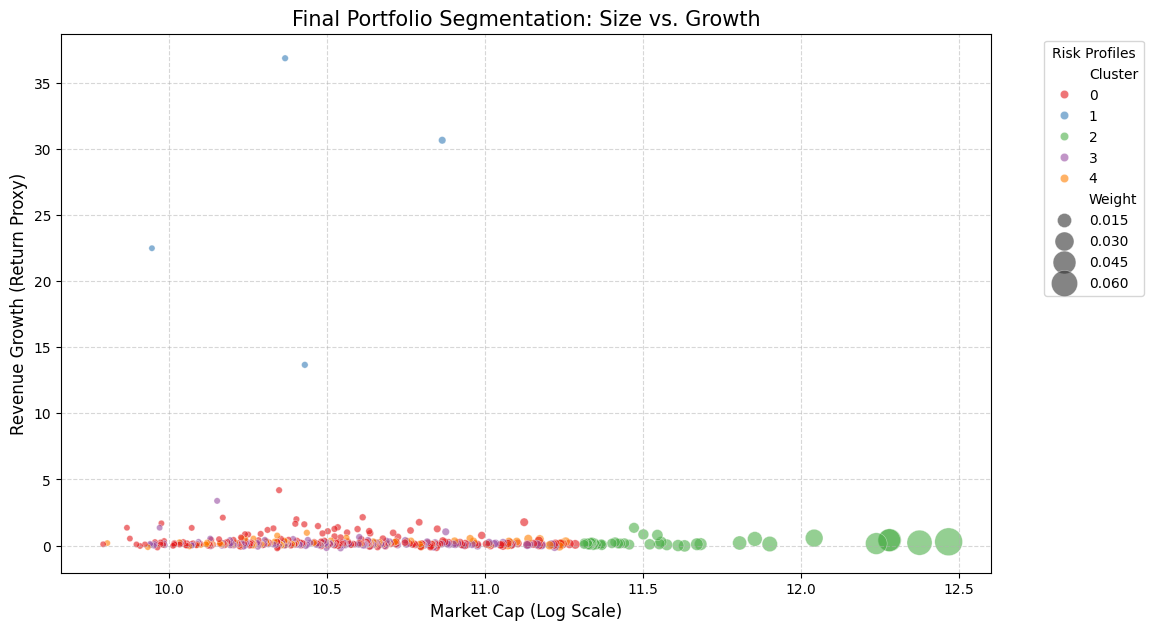

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Log_Marketcap',
    y='Revenuegrowth',
    hue='Cluster',
    palette='Set1',
    size='Weight',
    sizes=(20, 400),
    alpha=0.6
)

plt.title('Final Portfolio Segmentation: Size vs. Growth', fontsize=15)
plt.xlabel('Market Cap (Log Scale)', fontsize=12)
plt.ylabel('Revenue Growth (Return Proxy)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Risk Profiles')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

* Large-cap stocks (right side) cluster with low but stable revenue growth and higher portfolio weights, reflecting defensive, lower-risk positioning.
* Small and mid-cap stocks (left side) show wider growth dispersion, including a few high-growth outliers with smaller weights.
* Overall, the portfolio balances size-driven stability with selective growth exposure, aligning risk profiles to market-cap segments.


In [ ]:
def get_recommendations(risk_appetite):
    """
    risk_appetite: 'Low', 'Medium', 'High'
    """
    if risk_appetite == 'Low':
        # Recommend Cluster 2 (Stable Mega-Caps)
        target_cluster = 2
        advice = "Focus on capital preservation with high-quality, large-cap stabilizers."
    elif risk_appetite == 'High':
        # Recommend Cluster 1 (High Growth)
        target_cluster = 1
        advice = "Focus on aggressive growth through high-revenue-expansion assets."
    else:
        # Recommend mid-tier clusters
        target_cluster = 0 # or 3, 4
        advice = "Maintain a balanced approach with moderate growth and diversified risk."

    recs = df[df['Cluster'] == target_cluster][['Symbol', 'Shortname', 'Weight']].head(10)
    return advice, recs

# Example usage:
advice, stocks = get_recommendations('High')
print(f"Advice: {advice}")
display(stocks)

Advice: Focus on aggressive growth through high-revenue-expansion assets.


,Symbol,Shortname,Weight
113,MRNA,"Moderna, Inc.",0.001704
286,LYV,"Live Nation Entertainment, Inc.",0.000625
322,CCL,Carnival Corporation,0.000541
488,NCLH,Norwegian Cruise Line Holdings,0.000205


* The recommendation emphasizes an aggressive growth strategy, targeting companies with strong revenue expansion potential.
* Stocks like Moderna, Live Nation, Carnival, and Norwegian Cruise Line represent cyclical or innovation-driven businesses.


# **Deployment using only KMeans Clustering**

We did clustering using DBScan and Hierarchical also but DBScan was not used because there is no noise in our data and also in heirarchical clustering there was no clear distinction/parameters on which clustering was to be done therefore we didn't used this as well.

In [ ]:
import pickle
from google.colab import files

# 1. Save the K-Means Model
with open('portfolio_cluster_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# 2. Save the Scaler (Crucial for consistent deployment)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Save the Feature Names (To ensure Pycharm uses the same column order)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(final_features, f)

# Download files to your local machine for use in PyCharm
files.download('portfolio_cluster_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 1. Initialize KMeans with k=5
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)

# 2. Fit the model and predict labels using your scaled data
cluster_labels = kmeans_5.fit_predict(X_scaled)

# 3. Calculate the Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)

print(f"The Silhouette Score for k=5 is: {score:.4f}")

The Silhouette Score for k=5 is: 0.4668


A Silhouette Score of ~0.47 indicates moderate to good cluster separation, meaning the clusters are reasonably well-defined.

This suggests that k = 5 captures meaningful structure in the data without excessive overlap.

In [ ]:
# Save the dataframe with the cluster assignments to a CSV
df.to_csv('Hackathon_Processed.csv', index=False)

# Download it
from google.colab import files
files.download('Hackathon_Processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>